# 基于skimage库的图像滤波（Image filtering）
***

1. matploylib和skimage的安装
2. skimage中的常用滤波器

### 1. matploylib和skimage的安装
***
#### matploylib
matplotlib是一个Python 2D绘图库，它可以在各种平台上以各种硬拷贝格式和交互式环境生成出具有出版品质的图形。Matplotlib可用于Python脚本，Python和IPython shell，Jupyter笔记本，Web应用程序服务器和四个图形用户界面工具包。

#### skimage
skimage的全称为scikit-image，是基于python开发的数字图片处理包，它将图片作为numpy数组进行处理，并且提供了大量常见的图像处理相关的函数。

#### 安装
1. 在cmd命令行输入`conda activate cv`来激活我们建立好的虚拟环境
2. 通过pip在虚拟环境`cv`中安装matplotlib以及：`pip install matplotlib scikit-image`,运行界面如下，输入y确定安装。API调用手册：https://scikit-image.org/docs/stable/api/api.html
<img src='./fig/skimage_install.png' width="80%">

### 2. skimage中的常用滤波器
***
在skimage.filters中封装了许多常见的滤波器如均值滤波，高斯滤波，Sobel算子（边缘滤波）等，下面将调用封装好的API来可视化各种滤波器的效果

首先导入matplotlib，numpy。并从skiamge中导入io（读取模块）和filters（滤波模块）。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import numpy as np
import skimage
skimage.util.img_as_ubyte
from skimage import filters, io

预先定义好基于matplotlib的可视化图像函数
***

In [2]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title(label)

通过io模块读取图片，为可视化滤波效果做准备
***

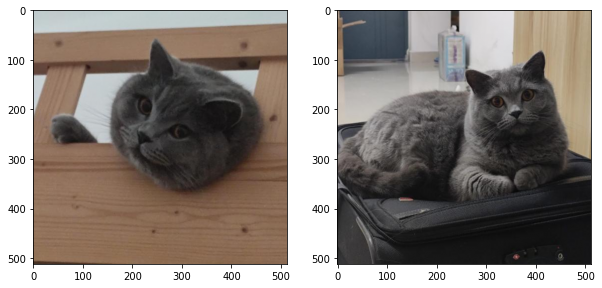

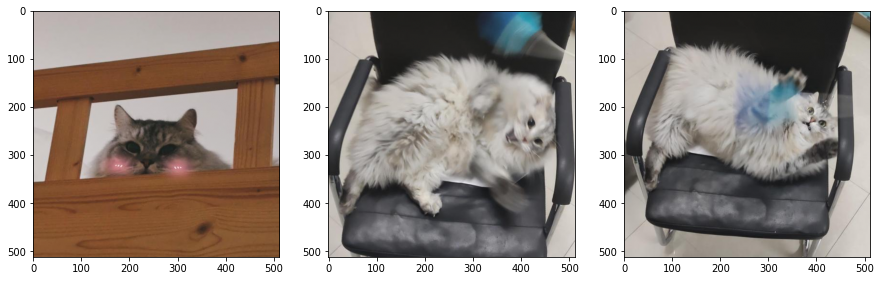

In [3]:
huahua1 = io.imread('./fig/huahua1.jpg')
huahua2 = io.imread('./fig/huahua2.jpg')
fufu1   = io.imread('./fig/fufu1.jpg')
fufu2   = io.imread('./fig/fufu2.jpg')
fufu3   = io.imread('./fig/fufu3.jpg')

imshow_all(huahua1, huahua2)
imshow_all(fufu1, fufu2, fufu3)

#### 高斯模糊滤波
***
调用`filters.gaussian`实现均值滤波，其中`sigma`是控制高斯核的大小，`sigma`越大，越模糊

C:\Users\cool_xuan\miniconda3\envs\cv\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


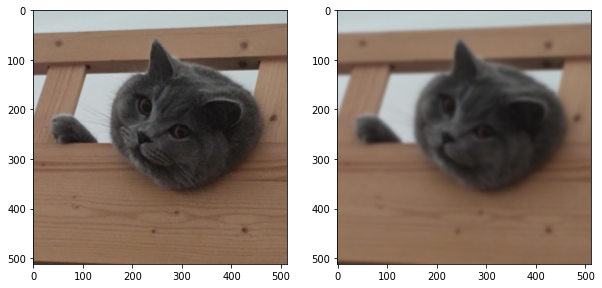

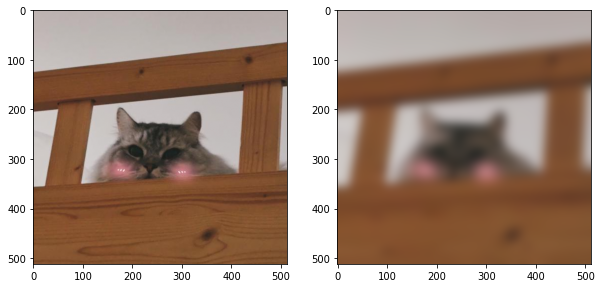

In [4]:
gaussian_huahua = filters.gaussian(huahua1, sigma=3)
gaussian_fufu   = filters.gaussian(fufu1, sigma=10)
imshow_all(huahua1, gaussian_huahua)
imshow_all(fufu1, gaussian_fufu)

#### 均值滤波
***
调用`filters.rank.mean`实现均值滤波， 使用`skimage.morphology`中的`disk`来设置滤波器大小，使用`skimage.color`中的`rgb2gray`来转化为灰度图

C:\Users\COOL_X~1\AppData\Local\Temp/ipykernel_37188/2696946524.py:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mean_huahua = filters.rank.mean(rgb2gray(huahua1), disk(5))
C:\Users\COOL_X~1\AppData\Local\Temp/ipykernel_37188/2696946524.py:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mean_fufu   = filters.rank.mean(rgb2gray(fufu1), disk(10))


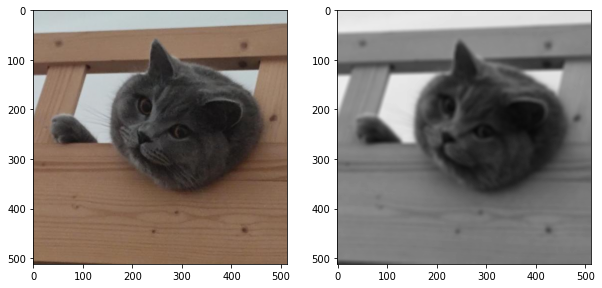

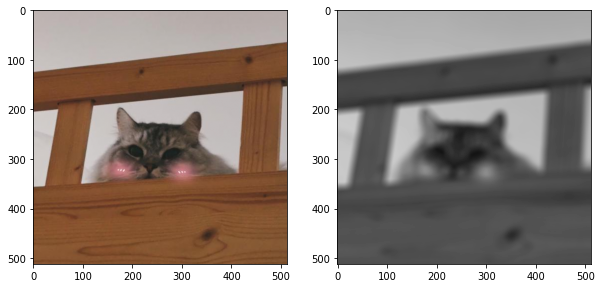

In [5]:
from skimage.morphology import disk
from skimage.color import rgb2gray

mean_huahua = filters.rank.mean(rgb2gray(huahua1), disk(5))
mean_fufu   = filters.rank.mean(rgb2gray(fufu1), disk(10))
imshow_all(huahua1, mean_huahua)
imshow_all(fufu1, mean_fufu)

#### 中值滤波
***
调用`filters.rank.median`实现均值滤波， 使用`skimage.morphology`中的`disk`来设置滤波器大小，使用`skimage.color`中的`rgb2gray`来转化为灰度图

C:\Users\COOL_X~1\AppData\Local\Temp/ipykernel_37188/1826307500.py:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  median_huahua = filters.rank.median(rgb2gray(huahua1), disk(5))
C:\Users\COOL_X~1\AppData\Local\Temp/ipykernel_37188/1826307500.py:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  median_fufu   = filters.rank.median(rgb2gray(fufu1), disk(10))


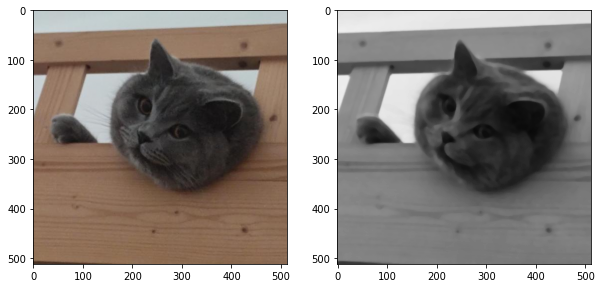

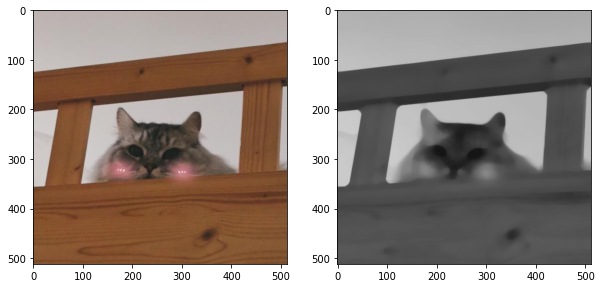

In [6]:
from skimage.morphology import disk
from skimage.color import rgb2gray

median_huahua = filters.rank.median(rgb2gray(huahua1), disk(5))
median_fufu   = filters.rank.median(rgb2gray(fufu1), disk(10))
imshow_all(huahua1, median_huahua)
imshow_all(fufu1, median_fufu)

#### Sobel算子（边缘滤波）
***
调用`filters.sobel`实现边缘滤波

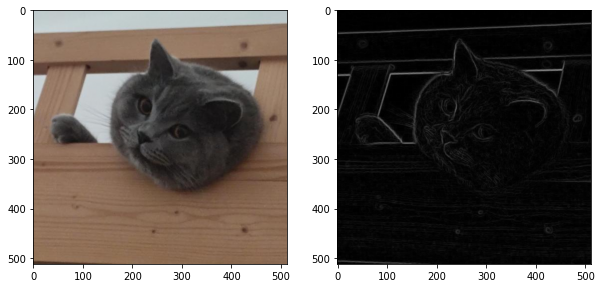

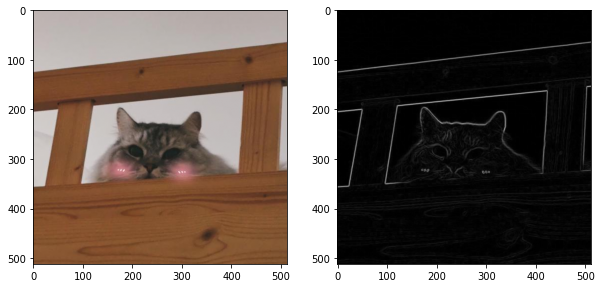

In [7]:
sobel_huahua = filters.sobel(rgb2gray(huahua1))
sobel_fufu   = filters.sobel(rgb2gray(fufu1))
imshow_all(huahua1, sobel_huahua*2)
imshow_all(fufu1, sobel_fufu*2)

#### Laplace算子（边缘滤波）
***
调用`filters.laplace`实现边缘滤波

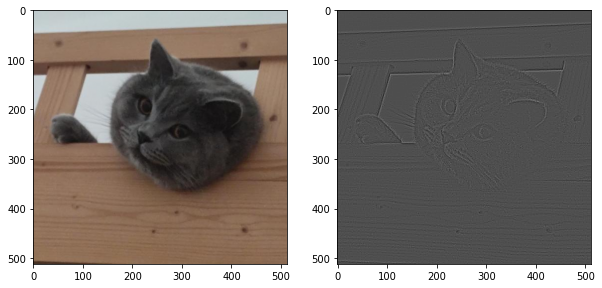

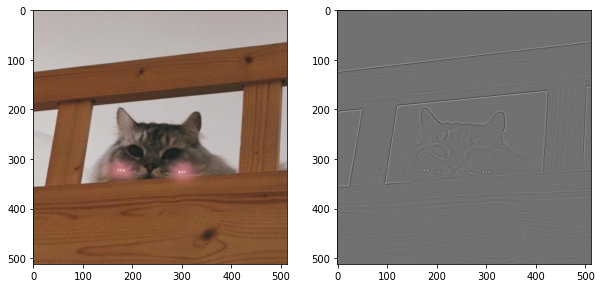

In [8]:
laplace_huahua = filters.laplace(rgb2gray(huahua1), ksize=3)
laplace_fufu   = filters.laplace(rgb2gray(fufu1), ksize=10)
imshow_all(huahua1, laplace_huahua*2)
imshow_all(fufu1, laplace_fufu*2)